# Filtro Laplaciano
#Daniel Anderson de Souza Leite
#Engenharia de Telecomunicações - IFCE
#Sistemas Multimídia
#Prof. Dr. Pedrosa

# Bibliotecas 

In [295]:
import cv2 #OpenCV
import numpy as np #biblioteca para trabalhar com arrays de maneira eficiente
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import math
from copy import copy
import statistics

# Leitura

In [296]:
img = cv2.imread('C:/Users/danie/Desktop/Scripsts Python/figs/ruido.png', cv2.IMREAD_GRAYSCALE)

#Mostra o tamanho da imagem
print("Tamanho da imagem")
np.shape(img)

Tamanho da imagem


(229, 280)

# Imagem com borda de preenchimento espelhado otimizada para filtro vizinhaça-N

In [297]:
#Recebe uma matriz e acrecenta bordas espelhadas
def preencher(imagem):
    #Recebe o tamanho da imagem e coloca nas variáveis m e n para uso posterior
    (m,n)=np.shape(imagem)

    # m número de linhas, n número de colunas. Soma de mais duas linhas(cime e baixo) e de duas colunas(esquerda e direita) para apliar a matrir devido ao preenchimento de borrda de vizinhaça-8.
    m=m+2
    n=n+2  

    #Cria uma matriz de zeros ampliada de duas linhas e duas colunas a mais. São as arestas acrescentadas devido ao kernel.
    imgpre=np.zeros((m,n), dtype=np.uint8)
    

    #Clone da imagem original para a imagem apliada com espelho das arestas e vértices (Preenchimento)

    #Arestas
    #Parte superior
    for p in range(0, n-2):
        imgpre[0][p+1] = imagem[0][p]
    #Parte inferior
    for q in range(0, n-2):
        imgpre[m-1][q+1] = imagem[m-3][q]
    #Parte esquerda
    for r in range(0, m-2):
        imgpre[r+1][0] = imagem[r][0]
    #Parte direita
    for s in range(0, m-2):
        imgpre[s+1][n-1] = imagem[s][n-3]

    #Vértices
    #Diagonal superior-esquerda
        imgpre[0][0] = imagem[0][0]
    #Diagonal Superior-direita
        imgpre[0][n-1] = imagem[0][n-3]
    #Diagonal Inferior-esquerda
        imgpre[m-1][0] = imagem[m-3][0]
    #Diagonal Inferior-direita
        imgpre[m-1][n-1] = imagem[m-3][n-3]

    #Face 
    for k in range(0,m-2):
        for l in range(0, n-2):
            imgpre[k+1][l+1] = imagem[k][l]
    return imgpre

# Kernel N-vizinhaça div do grad

In [298]:
#vizinhaça ímpar 8, 24, 48, 80, .., 440... (x*y)-1

n=24 #Vizinhaça do Kernel. Parâmetro alterável com as opções acima!

tam_kernl=int(math.sqrt(n+1))#Tamanho do kernel em linhas ou colunas. E.g.: vizinhaça-8 tem 3 linhas ou colunas.
num_iteracoes=int((tam_kernl-1)/2)#Númermo de interações para a função de preenchimento.
imgmat=copy(img)  # Verificar se não há problemas com tipo
for itera in range(num_iteracoes):# A cada itereção a matriz imgmat recebe um preenchimento de bordas. O número de iterações está atrelado ao tamanho da vizinhaça.
    imgmat=preencher(imgmat) 


In [299]:
#Kernel vizinhaça-N
knl=np.ones((tam_kernl,tam_kernl), dtype=np.int64)
posix=math.floor(tam_kernl/2)#Econtra a posição do centro, tamanho do kernel/2 arredondado para baixo pois o vetor começa com zero.
knl[posix][posix]=-n
temp=copy(knl)# Variável temporária igual ao kernel (knl) que será usada para realizar o processamento.

print("Kernel")
print(knl)

Kernel
[[  1   1   1   1   1]
 [  1   1   1   1   1]
 [  1   1 -24   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1   1]]


# Imagem de saída

In [300]:
#Recebe o tamanho da imagem original
(c,d)=np.shape(img)

#Cria uma matriz de zeros do mesmo tamanho da img original
imgout=np.zeros((c,d), dtype=np.int64)


#Tamanho da imagem de saída
print("Tamanho da imagem:")
np.shape(imgout)

Tamanho da imagem:


(229, 280)

# Processamento

In [301]:
#translada se negativo e equaliza eliminando os números negativos sem distorcer a imagem
def transladequalizer(imagem):
    #Varre a imagem ampliada realizando o equalizamento de histograma.    
    imax=255
    minn=imagem.min()
    maxx=imagem.max()
    (c,d)=np.shape(imagem)
    temp=np.zeros((c,d), dtype=np.int16)
    img_saida=copy(imagem)

    if (minn < 0):
        #Varre a imagem
        print("1")
        for x in range(c):
            for y in range(d):
                temp[x][y] = imagem[x][y]+(minn*-1)
        img_saida=copy(temp)
        minn=img_saida.min()
        maxx=img_saida.max()
    
    if(maxx>255 and minn>0):
        #Varre a imagem
        print("2")
        for x in range(c):
            for y in range(d):
                temp[x][y] = imagem[x][y]-(minn)
        img_saida=copy(temp)
        minn=img_saida.min()
        maxx=img_saida.max()

    #Equaliza a imagem
    for x in range(c):
        for y in range(d):
            temp[x][y] = ((img_saida[x][y]-minn)/(maxx-minn))*imax
    img_saida=copy(temp)
    img_saida=np.array(img_saida, dtype=np.uint8)
    return img_saida  

In [302]:
#Recebe o tamanho da imagem ampliada de arestas para realizar o processamento.
(t,v)=np.shape(imgmat)

#Varre a imagem ampliada realizando a convolução do do kernel com saída na imgout (imagem de saída).
num_bordas=num_iteracoes

#Varre a imagem
for x in range(num_bordas,t-num_bordas):
    for y in range(num_bordas, v-num_bordas):
        
        #Varre a interseção do kernel com a imagem
        for linha in range(0,tam_kernl):
            for coluna in range(0,tam_kernl):
                temp[linha][coluna]*=imgmat[x-num_bordas+linha][y-num_bordas+coluna] 
                
                
        #imgout recebe a soma do kernl temporário
        knlvector = np.asarray(temp).reshape(-1)#Trasforma matriz em vetor
        imgout[x-num_bordas][y-num_bordas] = abs(sum(knlvector))#imagem de saída recebe a soma do módulo do kernel
        temp=np.array(knl, dtype=np.int64)#reset do kernel temporário

In [303]:
imgout=transladequalizer(imgout)

In [304]:
# Pixels intensity da imagem de saída
print('\n'+"Pixels intensity da imagem de saída")
print('Max value: {}'.format(imgout.max()))
print('Min value: {}'.format(imgout.min()) +'\n')


#Mostra parcialmente a imagem de saída
print('\n'+'\n'+"Matriz da imagem de saída:")
print(imgout)


Pixels intensity da imagem de saída
Max value: 255
Min value: 0



Matriz da imagem de saída:
[[ 34  65   2 ... 104  41   9]
 [  0  65  68 ...  44  54  17]
 [ 39  93  35 ...   1  12   9]
 ...
 [ 56   2   6 ...  50  50  71]
 [ 27  67   7 ...  16   0  19]
 [ 53  25  17 ...   4   6   1]]


# Imagem de entrada para comparação

In [305]:
# Pixels intensity da imagem original
print('\n'+"Pixels intensity da imagem de entrada")
print('Max value: {}'.format(img.max()))
print('Min value: {}'.format(img.min())+'\n')

#Mostra parcialmente a imagem original para fins de comparação
print("Matriz da imagem de entrada:")
print(img)


Pixels intensity da imagem de entrada
Max value: 237
Min value: 0

Matriz da imagem de entrada:
[[112 123  86 ... 127  72  84]
 [ 97  70  62 ... 103  67  81]
 [ 79  57  77 ...  84  83  91]
 ...
 [135 158 158 ...  95  94  41]
 [182 194 164 ...  68  73  61]
 [205 185 175 ...  74  76  69]]


# Exibição pela matplotlib.pyplot

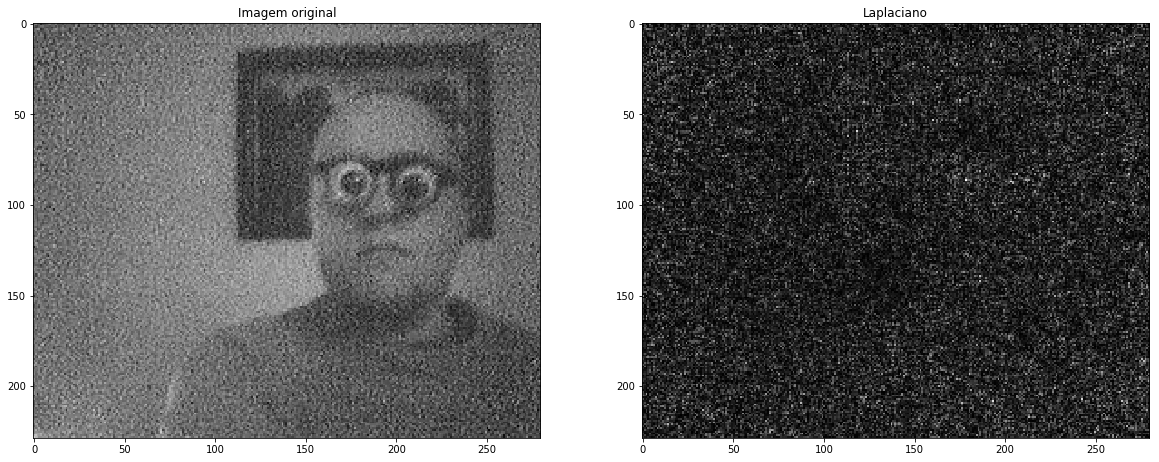

In [306]:
########## Using matplotlib #################

plt.figure(1, [20, 20])
plt.subplot(121), plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Imagem original')
plt.subplot(122), plt.imshow(imgout, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Laplaciano')

plt.show()

# Exibição pela Open CV

In [233]:
# Exibe a imagem de saída pela opencv em uma janela
cv2.imshow("Imagem", imgout)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [115]:
# Exibe a imagem de entrada pela opencv em uma janela
cv2.imshow("Imagem", img)
cv2.waitKey(0)

-1

# Histograma

<StemContainer object of 3 artists>

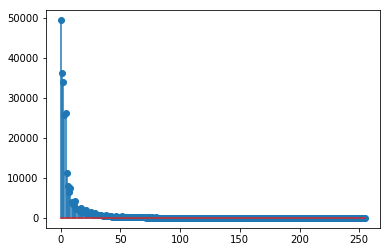

In [234]:
# Using opencv
# Mostra o histograma da imagem de saída
hist = cv2.calcHist([imgout], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histogram Laplaciano:")
plt.stem(hist)

<StemContainer object of 3 artists>

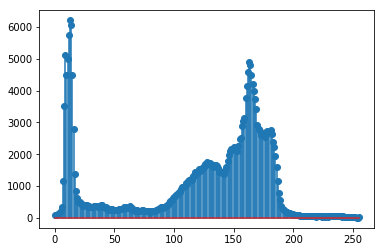

In [235]:
# Mostra o histograma da imagem original
hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histogram da imagem original:")
plt.stem(hist)

# Savar a imagem processada

In [258]:

cv2.imwrite('C:/Users/danie/Desktop/Scripsts Python/figs/Arquivos processados/laplaciano.png', imgout)

True